# Transformers Introduction
### Chapter 3 Module 1

## Section 1: PyTorch and HF Transformers

Welcome everyone to Chapter 3! We are getting right into the thick of it with a hands on introduction to transformers. Before we can get started, I want to make sure everyone is familiar with some key tools and terms

### [PyTorch](https://pytorch.org/)

Arguably the most fundamental library to machine learning, PyTorch is an open-source deep learning framework created by Facebook AI Research.
It’s like a powerful toolkit for building and training neural networks — but it's also flexible and easy to experiment with.

At its heart, PyTorch gives you three superpowers:

- Tensors: Big, multi-dimensional arrays (like advanced NumPy) that can run on CPUs or GPUs.

- Automatic Differentiation: It automatically calculates gradients, so you can easily train models.

- Neural Network Building Blocks: It provides everything you need to create, train, and deploy deep learning models.

### [Hugging Face Transformers](https://huggingface.co/docs/transformers/en/index)

Hugging Face transformers is an open-source library that gives you instant access to thousands of powerful AI models — ready to use with just a few lines of code.

Originally built for language models as transformers were becoming popular, `transformers` now supports Vision Transformers, Audio models, and multimodal models. `transformers` simplifies much of the complex work away from using and building transformers yourself. In a nutshell here is why it is awesome:

What it provides:

- Pretrained models you can download and run immediately

- Preprocessing tools (tokenizers, image processors)

- Simple APIs for training, fine-tuning, and inference

Why Does this Matter?:

- You don’t have to build complex architectures yourself.

- You don’t need to spend weeks training models from scratch.

- You can focus on applying and fine-tuning state-of-the-art models to your own projects.

PyTorch is the engine — Hugging Face Transformers are the race cars.

## Section 2: The Key Pieces for Vision Transformers

We will be loading the two main pieces needed for Vision Transformers. The first one is the model itself of course. We will be using [ViTForImageClassification](https://huggingface.co/docs/transformers/en/model_doc/vit#transformers.ViTForImageClassification), but just know that this is replaceable with any type of vision transformer based architecture in `transformers`. For example, another architecture we might look at later [Swin](https://arxiv.org/abs/2103.14030), is loaded using [SwinForImageClassification](https://huggingface.co/docs/transformers/en/model_doc/swin#transformers.SwinForImageClassification). Let's load our model below:

In [3]:
from transformers import ViTForImageClassification

# Load a pretrained ViT model
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")

# Look at the model's config (especially id2label mapping)
print(model.config.id2label)
print("Number of classes: " +  str(len(model.config.id2label)))

{0: 'tench, Tinca tinca', 1: 'goldfish, Carassius auratus', 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 3: 'tiger shark, Galeocerdo cuvieri', 4: 'hammerhead, hammerhead shark', 5: 'electric ray, crampfish, numbfish, torpedo', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich, Struthio camelus', 10: 'brambling, Fringilla montifringilla', 11: 'goldfinch, Carduelis carduelis', 12: 'house finch, linnet, Carpodacus mexicanus', 13: 'junco, snowbird', 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', 15: 'robin, American robin, Turdus migratorius', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water ouzel, dipper', 21: 'kite', 22: 'bald eagle, American eagle, Haliaeetus leucocephalus', 23: 'vulture', 24: 'great grey owl, great gray owl, Strix nebulosa', 25: 'European fire salamander, Salamandra salamandra', 26: 'common newt, Triturus vulgaris', 27: 'eft', 28: 'spotted salamander, Ambystoma maculatum', 29: 'axolotl, mu

Like most image classification models, are model is pretrained on ImageNet. This is a great time for a quick aside about transfer learning and pretraining with transformers.

### Transfer Learning and Pre-Training w/ Transformers

When comparing CNNs to Transformers, its important to know about [inductive bias](https://en.wikipedia.org/wiki/Inductive_bias). It is a term used in machine learning to describe the set of assumptions an algorithm uses to make its predictions. There are many ways to frame inductive bias, but it's kind of like the educated shortcuts an algorithm takes to get to the answer  based on what information it has so far.

Here's two inductive biases we see in CNNs:
- [Translational Equivariance](https://towardsdatascience.com/translational-invariance-vs-translational-equivariance-f9fbc8fca63a/)
    - An object can appear anywhere in the image and can be detected
- [Locality](https://arxiv.org/abs/2403.15707)
    - Pixels in an image interact mainly with surrounding pixels

CNNs are really good at these biases and kind of come pre-cooked with dealing with them in their architecure. Transformers do not. This is actually why on a small dataset size, there is a threshold where CNNs will  out perform transformers! However since the transformer is so easy to scale, it allows the ViT to overcome these biases with massives amount of data.

Connecting the dots, this is why pre-training transformers is so valuable and why being able to get a ton of open source pre-trained weights off of Hugging Face is even more valuable. Researchers will spend tons of time training transformers in all numbers of ways on giant datasets like [ImageNet](https://www.image-net.org/). This training is long and also very difficult to get right. So much so that most beginners or even long time engineers could not replicate the results without much expermentation. 

However, since the pre-trained weights are open source, we can bypass all of this to not start from scratch ever. The pretrained weights help our model understand how to find whats important in our images to make the best prediction possible. We can then fine tune the model to our dataset and transfer the learning from pre-training. 

All in all, you will almost never start from scratch with transformers and should find the best pretrained weights and architecture for your problem set! Now back to our example!

The second part of the pipeline we need to load is our [image proccessor](https://huggingface.co/docs/transformers/en/model_doc/vit#transformers.ViTImageProcessor). This massages are image into the correct format that our model is expecting on the input. It could be reshaping, padding, normalizing, or other forms of data augmentation, all depends on the model architecture and how it was trained. This is also supplied in the `transformers` library similar to the model.
    

In [4]:
from transformers import ViTImageProcessor

# Load the matching processor
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")

With our model and image processor loaded, we are almost ready to do our first inference! We just need to grab an image. Let's grab a picture of a cat online.

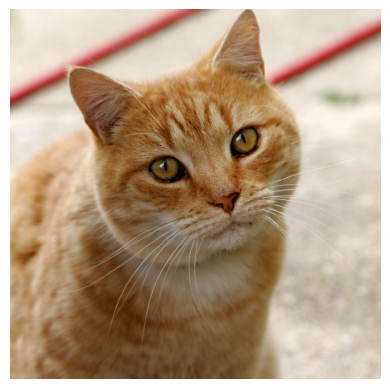

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Public domain image URL
url = "https://upload.wikimedia.org/wikipedia/commons/3/3a/Cat03.jpg"

# Stream content into BytesIO
response = requests.get(url)
image = Image.open(BytesIO(response.content)).convert("RGB")

# Display the image
plt.imshow(image)
plt.axis("off")
plt.show()

## Section 3: The Inference Pipeline

Okay we have everything we need to do inference on an image: the model, the image processor, and of course the image itself. The pipeline should always follow as:

1. Load your image
2. Preprocess your image
3. Inference on your image
4. Decode the prediction


Now we will try in code!

In [ ]:
# 1. Load our image from before
response = requests.get(url)
image = Image.open(BytesIO(response.content)).convert("RGB")

# 2. Preprocess
inputs = processor(images=image, return_tensors="pt")

# 3. Run inference
outputs = model(**inputs)

# 4. Decode prediction
predicted_class_idx = outputs.logits.argmax(-1).item()
predicted_label = model.config.id2label[predicted_class_idx]

print(f"Predicted class: {predicted_label}")

Predicted class: tiger cat


Congrats! You have built your first Vision Transformer Inference Pipeline! You are well on your way to becoming a transformer pro. In our next module, we will bring back in FiftyOne to understand how we can build and work with dataset for computer vision. Afterwards, we will wrap up Chapter 3 with inferencing over an entire dataset using our Vision Transformer!